# 1.Install and Import Dependancies

In [1]:
!pip install tensorflow==2.13 opencv-python mediapipe scikit-learn matplotlib

In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mp_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Colour Conversion BGR to RGB
    image.flags.writeable = False # Image no longer writeable
    results = model.process(image) # Making prediction
    image.flags.writeable = True # Image now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Colour Conversion RGB to BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    # Draws face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draws pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draws left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draws right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #Reading feed
        ret,frame = cap.read()
        
        #Making Detections
        image,results = mp_detection(frame,holistic)
        print(results)
        
        #Draw Landmarks
        draw_landmarks(image, results)
        
        #Showing Frame
        cv2.imshow('OpenCV Feed', image)
        
        #To exit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
len(results.left_hand_landmarks.landmark)

21

In [14]:
results

mediapipe.python.solution_base.SolutionOutputs

In [15]:
draw_landmarks(frame, results)

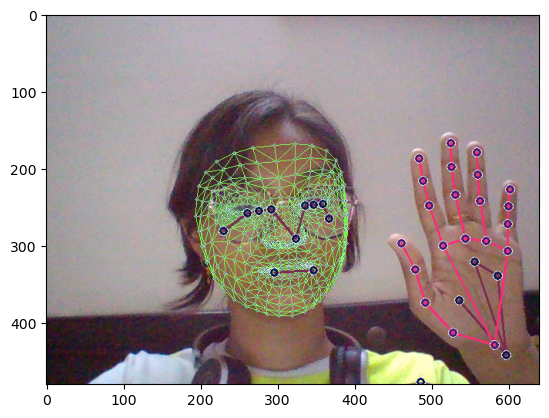

In [16]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [17]:
len(results.pose_landmarks.landmark)

33

In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [19]:
#Converting to numpy arrays and error handling

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)
result_test

array([ 0.50634104,  0.60805625, -0.98724067, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 0.50634104,  0.60805625, -0.98724067, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [23]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'yes', 'no', 'friend', 'iloveyou'])

# 30 videos 
num_sequences = 30

# Videos will be 30 frames in length
sequence_length = 30

In [24]:
for action in actions: 
    for sequence in range(num_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [25]:
#Saving the frames as numpy arrays

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(num_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mp_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_COMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

# 6.Preprocess Data and Create Labels and Features

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'yes': 2, 'no': 3, 'friend': 4, 'iloveyou': 5}

In [30]:
#Labelling each video
sequences, labels = [], []
for action in actions:
    for sequence in range(num_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [31]:
np.array(labels).shape

(180,)

In [32]:
X = np.array(sequences)
X.shape

(180, 30, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
X_test.shape

(9, 30, 1662)

In [37]:
y_test.shape

(9, 6)

# 7.Build and Train an LSTM Neural Network

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [39]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [40]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
6/6 [==============================] - 0s 67ms/step - loss: 1.7917 - categorical_accuracy: 0.1696
Epoch 2/200
6/6 [==============================] - 0s 70ms/step - loss: 1.7917 - categorical_accuracy: 0.1696
Epoch 3/200
6/6 [==============================] - 0s 64ms/step - loss: 1.7916 - categorical_accuracy: 0.1696
Epoch 4/200
6/6 [==============================] - 0s 64ms/step - loss: 1.7917 - categorical_accuracy: 0.1696
Epoch 5/200
6/6 [==============================] - 0s 61ms/step - loss: 1.7916 - categorical_accuracy: 0.1696
Epoch 6/200
6/6 [==============================] - 0s 63ms/step - loss: 1.7916 - categorical_accuracy: 0.1696
Epoch 7/200
6/6 [==============================] - 0s 64ms/step - loss: 1.7916 - categorical_accuracy: 0.1696
Epoch 8/200
6/6 [==============================] - 0s 65ms/step - loss: 1.7916 - categorical_accuracy: 0.1696
Epoch 9/200
6/6 [==============================] - 0s 59ms/step - loss: 1.7916 - categorical_accuracy: 0.1696
Epoch 10/2

6/6 [==============================] - 0s 61ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 75/200
6/6 [==============================] - 0s 63ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 76/200
6/6 [==============================] - 0s 62ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 77/200
6/6 [==============================] - 0s 66ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 78/200
6/6 [==============================] - 0s 64ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 79/200
6/6 [==============================] - 0s 61ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 80/200
6/6 [==============================] - 0s 60ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 81/200
6/6 [==============================] - 0s 64ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 82/200
6/6 [==============================] - 0s 64ms/step - loss: 1.7914 - categorical_accuracy: 0.1754
Epoch 83/200
6

6/6 [==============================] - 0s 60ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 148/200
6/6 [==============================] - 0s 62ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 149/200
6/6 [==============================] - 0s 60ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 150/200
6/6 [==============================] - 0s 63ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 151/200
6/6 [==============================] - 0s 59ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 152/200
6/6 [==============================] - 0s 62ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 153/200
6/6 [==============================] - 0s 60ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 154/200
6/6 [==============================] - 0s 58ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 155/200
6/6 [==============================] - 0s 62ms/step - loss: 1.7913 - categorical_accuracy: 0.1754
Epoch 

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 596774 (2.28 MB)
Trainable params: 596774 

# 8.Making Predictions

In [47]:
res = model.predict(X_test)

1/1 [==============================] - 0s 357ms/step


In [48]:
actions[np.argmax(res[4])]

'hello'

In [49]:
actions[np.argmax(y_test[4])]

'no'

# 9.Saving Weights

In [50]:
model.save('action.h5')

C:\Users\anika\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 10.Evaluation using Confusion Matrix and Accuracy

In [51]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [52]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 37ms/step


In [53]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [54]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0., 9.],
        [0., 0.]],

       [[8., 0.],
        [1., 0.]],

       [[8., 0.],
        [1., 0.]],

       [[6., 0.],
        [3., 0.]],

       [[7., 0.],
        [2., 0.]],

       [[7., 0.],
        [2., 0.]]])

In [55]:
accuracy_score(ytrue, yhat)

0.0

# 11.Testing

In [56]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mp_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
          # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

NameError: name 'prob_viz' is not defined

In [57]:
cap.release()
cv2.destroyAllWindows()